# Venta de Viviendas en Seattle; EDA & Minería de Datos.

## Introducción
El objetivo de este trabajo es explorar un dataset sobre la venta de viviendas en Seattle durante el periodo comprendido entre mayo de 2014 y mayo de 2015 con el objetitvo final de predecir el precio de dichas viviendas con una serie de variables predictoras que ofrece el dataset. Este dataset proviene del módulo de Minería de Datos y Modelización Predictiva del Máster de la Universidad Complutense de Madrid en Big Data, Ciencia de Datos y Business Analytics, y se utiliza en su propio marco de estudio añadiendo nociones de Machine Learning.

El análisis incluye la preparación de los datos, su exploración y posterior construcción de modelos para predecir el precio de las viviendas. Se ha trabajado con un conjunto de variables que describen las características de las propiedades y su entorno. Ver archivo data/'Doc_HousingSales_Regression.pdf'.

A lo largo de este Notebook, se llevarán a cabo diversas técnicas en minería de datos para abordar los errores, incoherencias y dificultades que presentan los datos a depurar, para posteriormente proponer el mejor modelo predictivo adecuado para capturar las relaciones entre las variables explicativas y la variable objetivo 'precio'.

Sin embargo, esto nos plantea una cuestión importante (dentro de la simplicidad de las dimensiones del dataset de estudio): ¿qué tipo de modelo sería más adecuado para capturar un fenómeno como el precio de las viviendas? ¿Es suficiente emplear un modelo lineal, o deberíamos explorar alternativas más avanzadas que consideren posibles relaciones no lineales y efectos más intrincados entre las variables? Estas preguntas serán clave para reflexionar sobre el enfoque adoptado y los posibles caminos a seguir en futuros análisis.

## Lectura e inspección de datos, EDA.
### Tipo de variables, valores únicos, distribuciones, NAs declarados y no declarados, etc.

Importamos y cargamos las librerías necesarias para trabajar.

In [1]:
# Procesamiento y visualizacion de datos.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# EDA y minería de datos
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from optbinning import ContinuousOptimalBinning

# Otras
import sys
import os
import warnings
warnings.filterwarnings('ignore')

Importemos también el modulo data_mining.py que nos ayudará con el tratamiento de las variables para gestionar outliers, tranformaciones de variables y demás.

In [2]:
sys.path.append(os.path.abspath('../scripts'))

import EDA_DataMining

Cargamos y visualizamos el dataset.

In [3]:
df_Viv = pd.read_csv('C:/Users/jeje9/Projects/Housing Sales Seattle/data/raw_data/housingsales_seattle.csv')

In [4]:
df_Viv

,year,month,price,Luxury,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,basement,yr_built,yr_renovated,lat,long
0,2014,7,653450,1,3,2.5,2070,-1,1.0,0,0,C,1540,1,1980,0,47.5936,-122.013
1,2014,6,710000,1,2,1.5,1640,-1,1.5,0,0,A,1540,1,1916,0,47.6624,-122.325
2,2014,10,780000,1,4,3.5,3720,-1,1.0,0,1,B,3720,0,2007,0,47.3216,-121.940
3,2014,12,795000,1,3,3.5,2260,-1,2.0,0,0,B,1880,1,2003,0,47.6422,-122.361
4,2014,10,399950,0,3,2.0,2050,-1,1.0,0,0,A,1170,1,1960,0,47.7447,-122.328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2015,2,370000,0,2,2.5,1390,1821,2.0,0,0,B,1180,1,2007,0,47.5537,-122.282
4996,2015,1,374950,0,4,2.0,1660,8160,1.0,0,0,B,1660,0,1974,0,47.4483,-122.129
4997,2015,2,234000,0,3,2.0,1480,8475,1.0,0,0,C,1480,0,1968,0,47.3126,-122.361
4998,2015,3,475000,0,3,3.0,2540,18900,1.0,0,0,B,1580,1,1978,0,47.7540,-122.144


In [5]:
df_Viv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          5000 non-null   int64  
 1   month         5000 non-null   int64  
 2   price         5000 non-null   int64  
 3   Luxury        5000 non-null   int64  
 4   bedrooms      5000 non-null   int64  
 5   bathrooms     5000 non-null   float64
 6   sqft_living   5000 non-null   int64  
 7   sqft_lot      5000 non-null   int64  
 8   floors        5000 non-null   float64
 9   waterfront    5000 non-null   int64  
 10  view          5000 non-null   int64  
 11  condition     5000 non-null   object 
 12  sqft_above    5000 non-null   int64  
 13  basement      5000 non-null   int64  
 14  yr_built      5000 non-null   int64  
 15  yr_renovated  5000 non-null   int64  
 16  lat           5000 non-null   float64
 17  long          5000 non-null   float64
dtypes: float64(4), int64(13), ob

Se observa que al menos no hay NAs declarados. Respecto al tipo de cada variable quizás sí deberíamos de hacer cambios.

Mostremos los descriptivos de las variables numéricas, y posteriormente se representarán el gráfico de distribución o de barras según la tipología inicial de cada variable, para tener una primera visión global de cada variable.

In [6]:
df_Viv.describe().round(1)

,year,month,price,Luxury,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,basement,yr_built,yr_renovated,lat,long
count,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0
mean,2014.3,6.6,544129.1,0.4,3.6,2.1,2077.4,13732.5,1.5,-0.0,0.1,1784.9,0.4,1971.1,86.2,47.6,-122.2
std,0.5,3.1,372986.9,0.5,3.7,0.9,916.5,37581.4,0.5,0.2,0.3,824.3,0.5,29.2,405.5,0.1,0.1
min,2014.0,1.0,86500.0,0.0,0.0,0.0,370.0,-1.0,1.0,-1.0,0.0,370.0,0.0,1900.0,0.0,47.2,-122.5
25%,2014.0,4.0,324937.5,0.0,3.0,1.5,1410.0,4500.0,1.0,0.0,0.0,1190.0,0.0,1951.0,0.0,47.5,-122.3
50%,2014.0,6.0,451000.0,0.0,3.0,2.5,1910.0,7312.0,1.5,0.0,0.0,1550.0,0.0,1975.0,0.0,47.6,-122.2
75%,2015.0,9.0,645000.0,1.0,4.0,2.5,2560.0,10284.2,2.0,0.0,0.0,2220.0,1.0,1996.0,0.0,47.7,-122.1
max,2015.0,12.0,7062500.0,1.0,70.0,6.0,10040.0,1164794.0,3.5,1.0,1.0,7680.0,1.0,2015.0,2015.0,47.8,-121.4


In [7]:
num_cols = df_Viv.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df_Viv.select_dtypes(include=['category', 'object']).columns

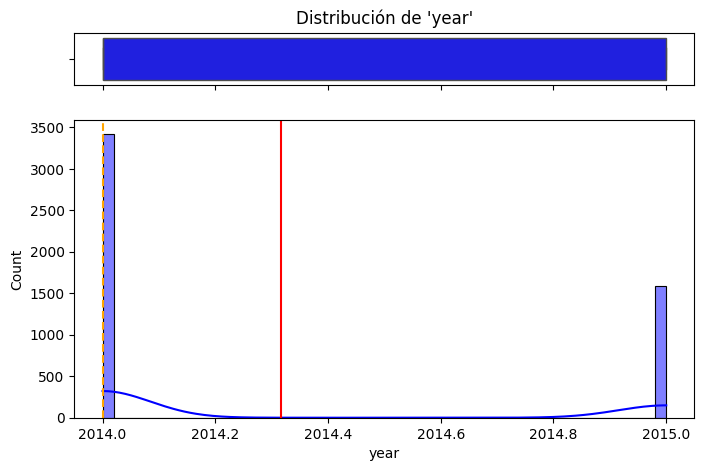

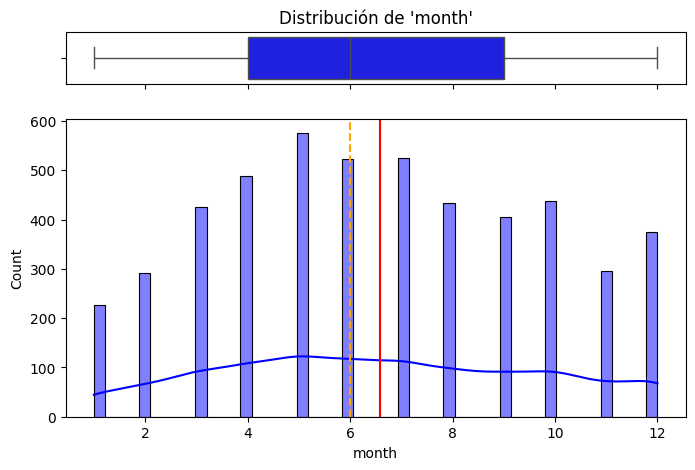

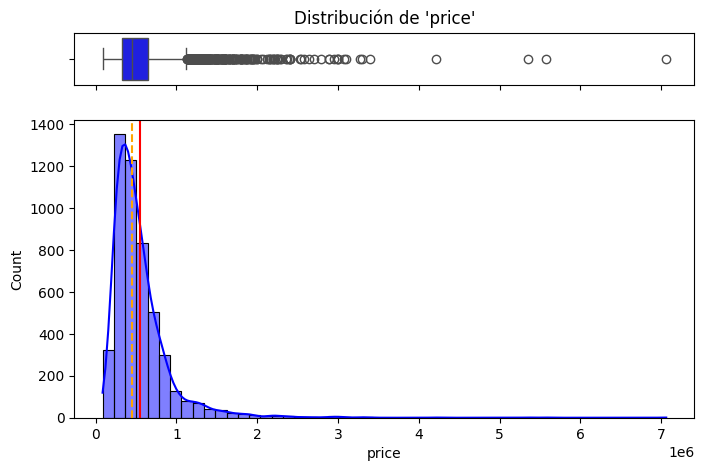

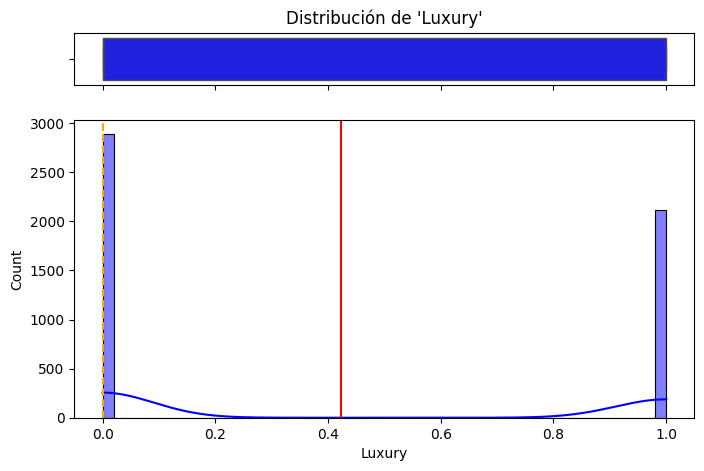

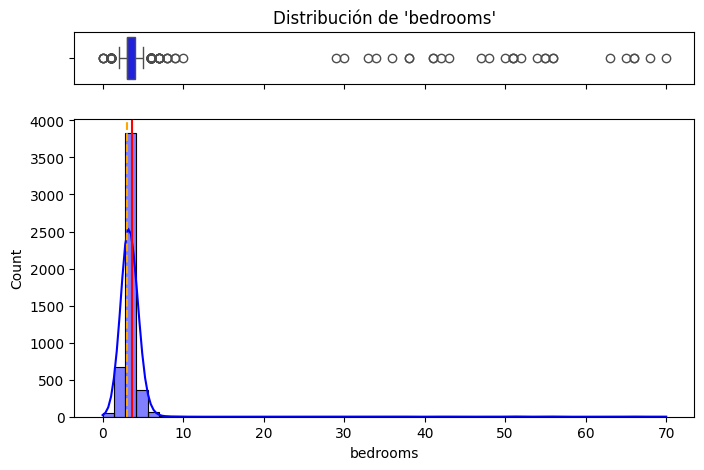

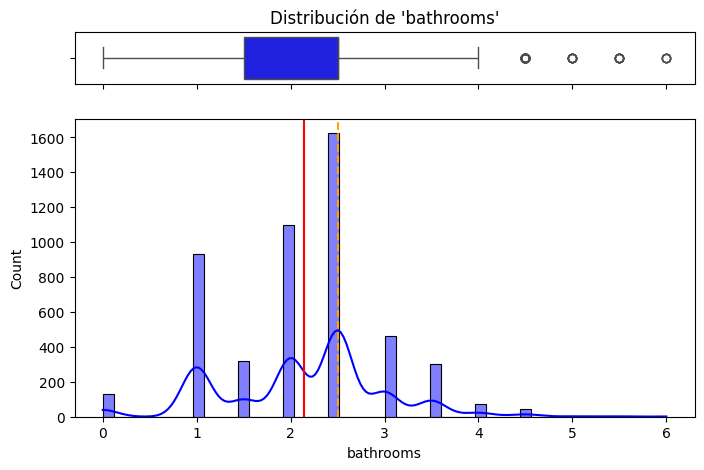

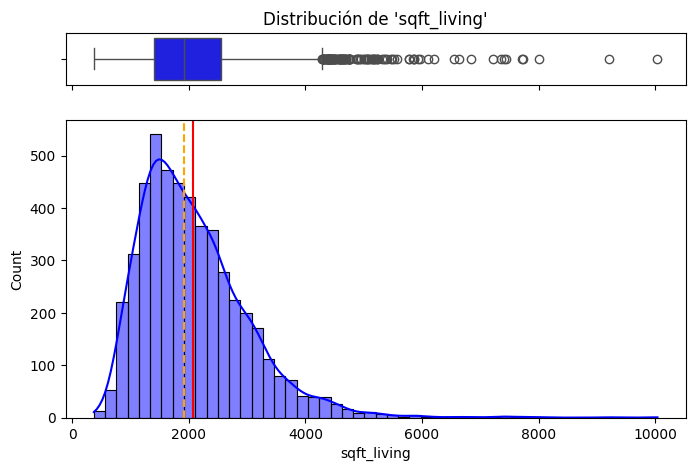

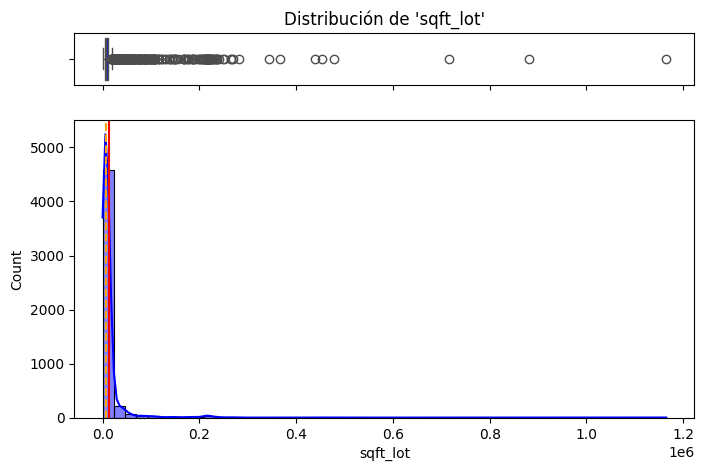

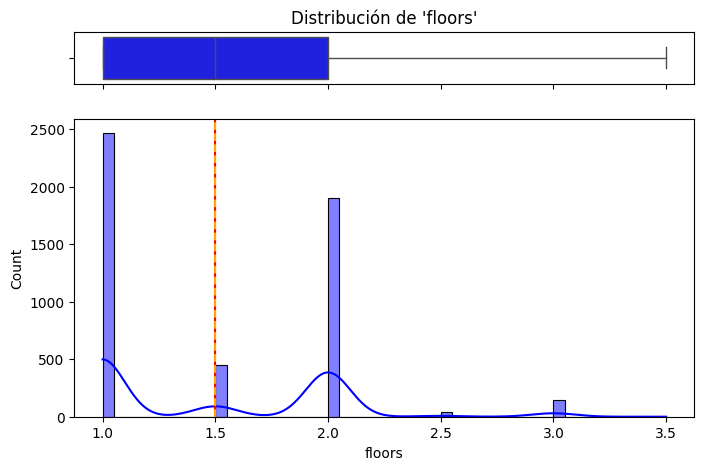

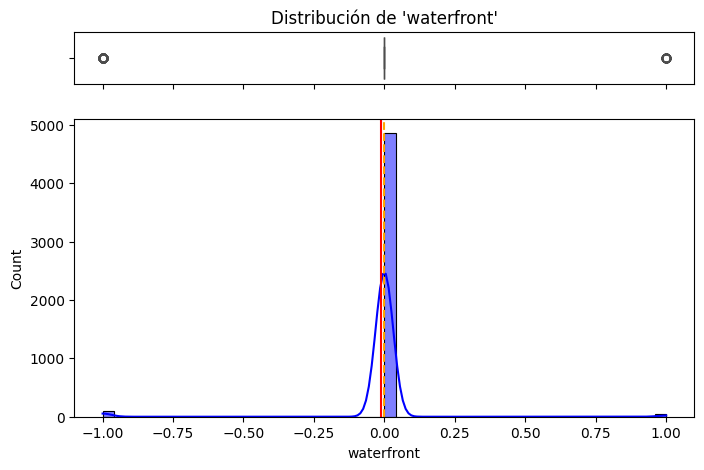

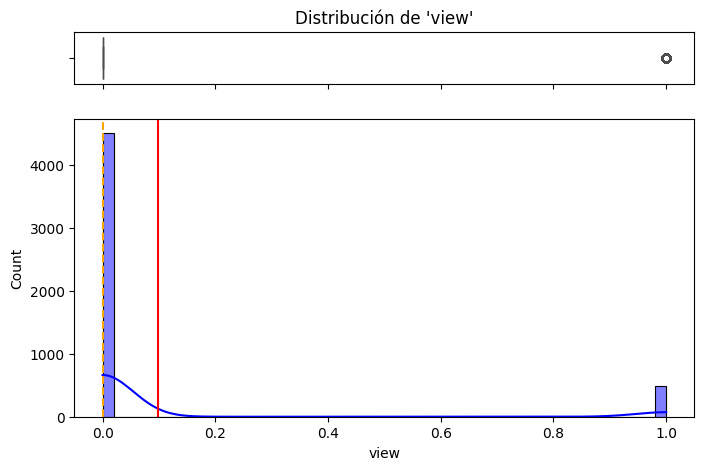

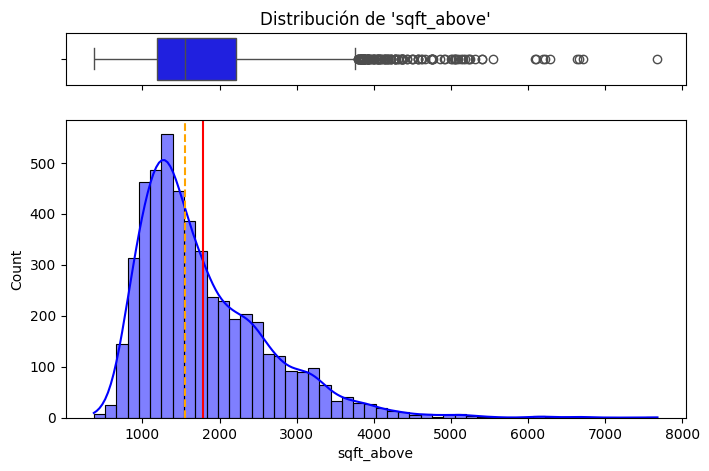

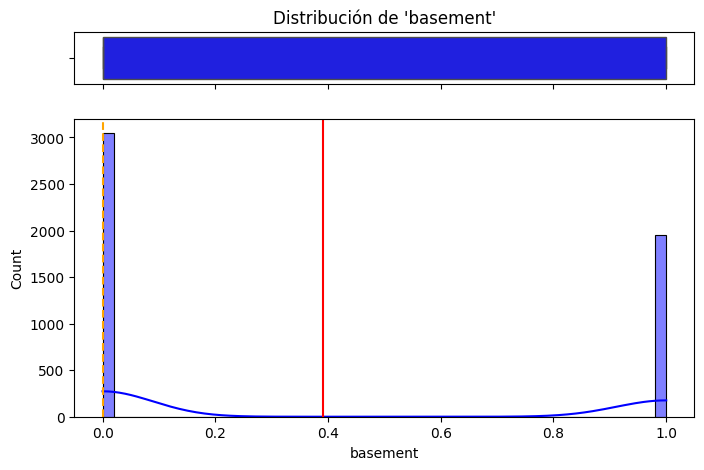

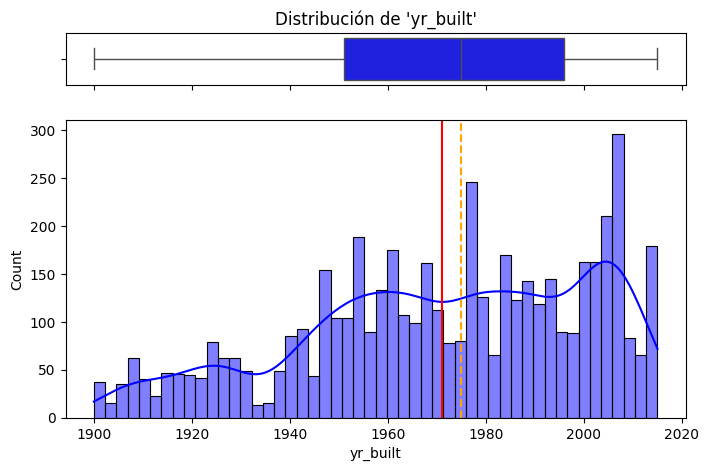

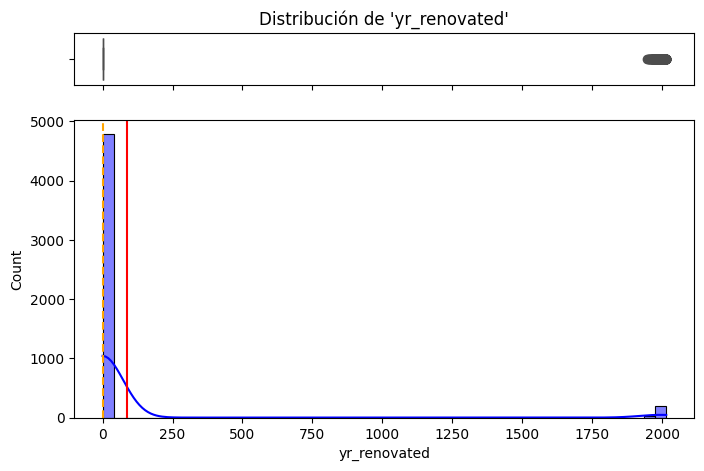

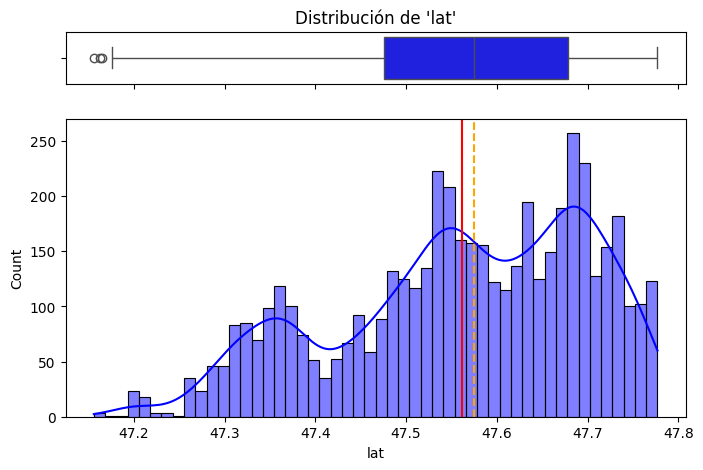

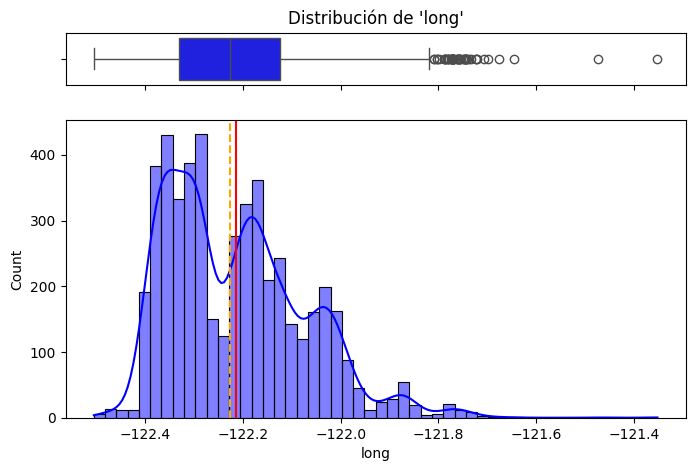

In [8]:
EDA_DataMining.num_graph(df_Viv[num_cols])

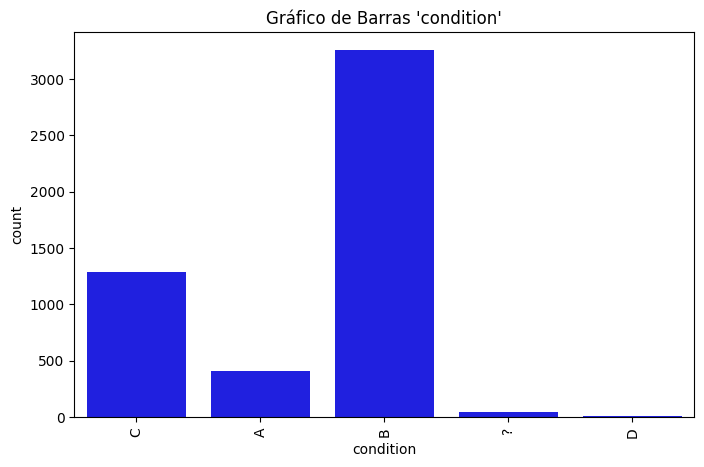

In [9]:
EDA_DataMining.cat_graph(df_Viv[cat_cols])

Una buena práctica a realizar también cuando tenemos variables de geolocalización referidas a longitud y latitud, es graficarlas con un gráfico de puntos, para observar como se comportan en relación y que no haya ninguna anomalía entre ellas.

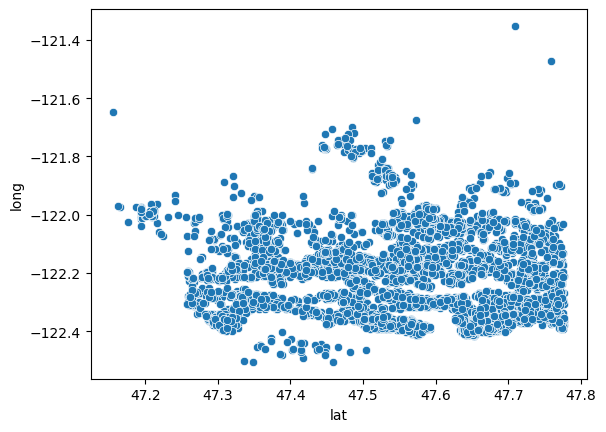

In [10]:
sns.scatterplot(x = df_Viv['lat'], y = df_Viv['long'])
plt.show()

El siguiente conocer un poco más sobre la naturaleza las distribuciones originales de cada variable, para ello también recurrimos a nuestro módulo 'data_mining' en el cual se utiliza la función plot() que a su vez acude a un par de funciones más para representar gráficamente las distribuciones de las variables según son variables continuas o categóricas.

Lo primero que se aprecia es que parece que sí que hay NAs no declarados en algunas variables, por ello tratemos de etiquetarlos en principio como NAs. También se confirma que se ha de cambiar el tipo de algunas variables.

Se realiza la división del dataframe entre variables predictoras y la variable objetivo.

In [11]:
imput = df_Viv.drop(['price'],axis=1)
imput.head()

,year,month,Luxury,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,basement,yr_built,yr_renovated,lat,long
0,2014,7,1,3,2.5,2070,-1,1.0,0,0,C,1540,1,1980,0,47.5936,-122.013
1,2014,6,1,2,1.5,1640,-1,1.5,0,0,A,1540,1,1916,0,47.6624,-122.325
2,2014,10,1,4,3.5,3720,-1,1.0,0,1,B,3720,0,2007,0,47.3216,-121.940
3,2014,12,1,3,3.5,2260,-1,2.0,0,0,B,1880,1,2003,0,47.6422,-122.361
4,2014,10,0,3,2.0,2050,-1,1.0,0,0,A,1170,1,1960,0,47.7447,-122.328


In [12]:
varObj = df_Viv[['price']]

Cambiamos variables a tipo category según la condición dada.

In [13]:
for col in imput.columns:
    if imput[col].nunique() < 13:
        imput[col] = imput[col].astype('category')

Reasignamos columnas numéricas y categóricas según el cambio realizado anterior.

In [14]:
num_cols = imput.select_dtypes(include=['float64', 'int64']).columns
cat_cols = imput.select_dtypes(include=['category', 'object']).columns

### Outliers

Pasemos a la gestión de posibles outliers de nuestras variables continuas, primero se calcula el coeficiente de asimetría para cada variable.

In [15]:
imput[num_cols].skew()

bedrooms        12.916180
sqft_living      1.404513
sqft_lot        13.051348
sqft_above       1.414411
yr_built        -0.465003
yr_renovated     4.495506
lat             -0.511038
long             0.796275
dtype: float64

La mayoría de variables presentan una asimetría importante ya sea por la derecha o por la izquierda, excepto month y bathrooms que tiene un coeficiente de asimetría cercano al 0, con el que podriamos considerar distribución simétrica para dichas variables.

In [16]:
imput.select_dtypes(include=np.number).apply(lambda x: EDA_DataMining.manage_outliers(x))

,bedrooms,sqft_living,sqft_lot,sqft_above,yr_built,yr_renovated,lat,long
0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00
1,0.6,0.28,7.36,0.24,0.0,4.32,0.0,0.04
2,0.6,0.28,7.36,0.24,0.0,4.32,0.0,0.04


Varias variables tienen outliers, todas menos sqft_lot y yr_renovated no superan el 1% de outliers, aún así, solo gestionarelos los outliers de bedrooms, sqft_lot, sqft_living y sqft_above, del resto de variables no porque luego se les realizará transformaciones con las cuales nos podemos permitir conservar los outliers.

In [17]:
to_wins = ['bedrooms', 'sqft_lot', 'sqft_living', 'sqft_above']
not_wins = ['yr_built', 'yr_renovated', 'lat', 'long']

Se aplica la gestión de outliers en modo winsor para las variables correspondientes en las cuales dichos outliers alterán gravemente la distribución de los datos

In [18]:
imput_winsor = imput[to_wins].apply(lambda x: EDA_DataMining.manage_outliers(x,clas='winsor'))

imput_winsor.sort_values(by='bedrooms').tail()

,bedrooms,sqft_lot,sqft_living,sqft_above
3964,10,14862,2420,1380
650,10,4373,1100,820
42,10,-1,3190,1890
2648,10,1101,1240,1080
1763,10,9199,1190,1190


Aplicamos los cambios de las variables winsorizadas a las variables originales.

In [19]:
imput[to_wins] = imput_winsor

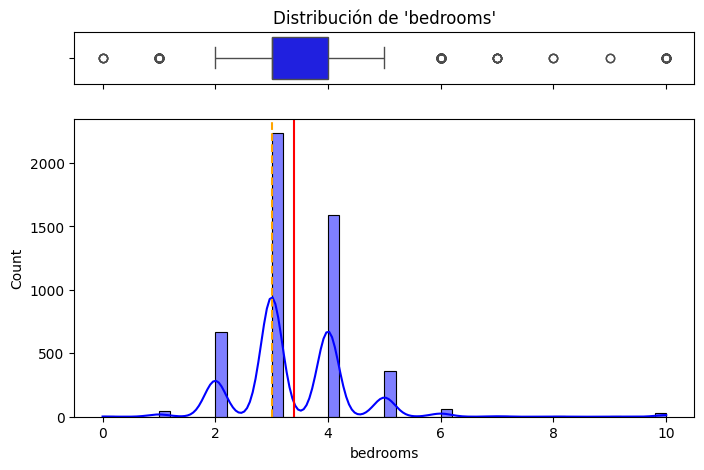

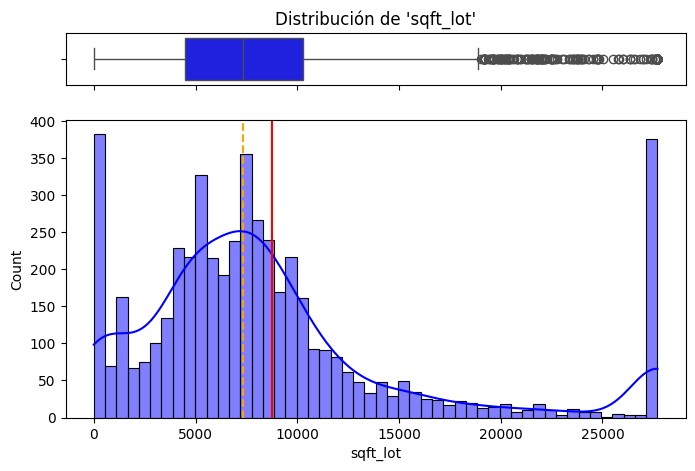

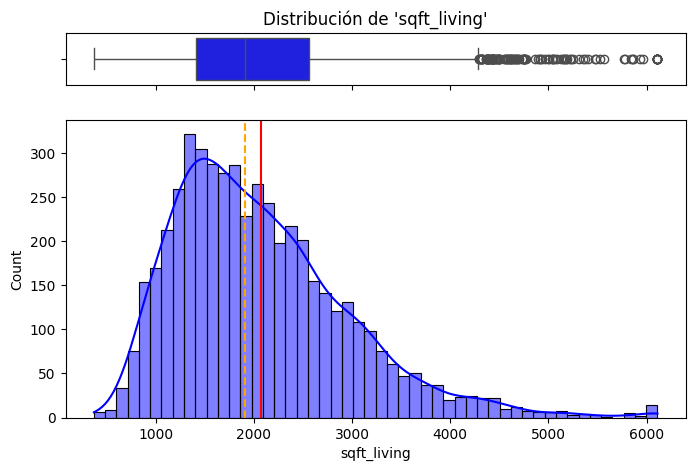

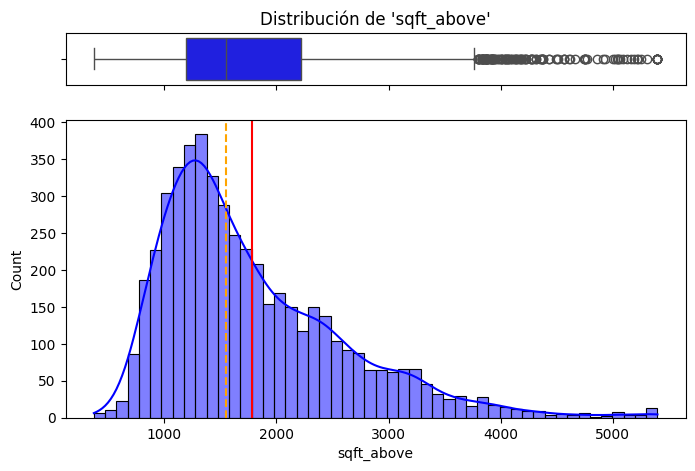

In [20]:
EDA_DataMining.num_graph(imput[to_wins])

Muy sobrecargada la variable sqft_lot en la cola derecha de la distribución. Se podría dejar sin gestionar los outliers de dciha varible, y aplicar la tranformación directamente, o primero tranformarla y luego gestionar outliers.

In [21]:
imput.to_csv('../data/freeze_data/df_wins.csv', index=False)

### NAs

Asignamos NAs a los valores de las variables que no son posibles según su respectiva naturaleza. A estos valores se les denomina NAs no declarados.

In [22]:
imput.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   year          5000 non-null   category
 1   month         5000 non-null   category
 2   Luxury        5000 non-null   category
 3   bedrooms      5000 non-null   int64   
 4   bathrooms     5000 non-null   category
 5   sqft_living   5000 non-null   int64   
 6   sqft_lot      5000 non-null   int64   
 7   floors        5000 non-null   category
 8   waterfront    5000 non-null   category
 9   view          5000 non-null   category
 10  condition     5000 non-null   category
 11  sqft_above    5000 non-null   int64   
 12  basement      5000 non-null   category
 13  yr_built      5000 non-null   int64   
 14  yr_renovated  5000 non-null   int64   
 15  lat           5000 non-null   float64 
 16  long          5000 non-null   float64 
dtypes: category(9), float64(2), int64(6)
memory usage: 3

In [23]:
imput.loc[imput['sqft_lot'] == -1, 'sqft_lot'] = np.nan
imput.loc[imput['waterfront'] == -1, 'waterfront'] = np.nan

Para imputar los NAs de estas variables se realizarán mediante dos métodos de imputación distintos: K-Nearest Neighbors para sqft_lot y una imputación simple por la moda para waterfront.

#### Imputación Simple mediante Moda.

In [24]:
imputer = SimpleImputer(strategy='most_frequent')

In [25]:
imput[['waterfront']] = imputer.fit_transform(imput[['waterfront']])

In [26]:
imput["waterfront"] = imput["waterfront"].astype(int)
imput["waterfront"] = imput["waterfront"].astype("category")

#### Imputación mediante K-Nearest Neighbors.

Para la variable 'sqft_lot', se utiliza la imputación basada en vecinos cercanos K-Nearest Neighbors, este método de imputación utiliza los valores de los registros más cercanos para estimar los valores faltantes, en este caso como tenemos una variable continua de la cual estimar sus NAs, se calcula el promedio de los valores de los vecinos más cercanos.

In [27]:
imput_cont = imput.select_dtypes(include=['float64', 'int64']).columns
imput_cat = imput.select_dtypes(include=['category', 'object']).columns

Aplicamos escalado de datos MinMax Scaler para que todas se encuentren en el mismo rango de 0 a 1, así todas tienen la misma importancia en la imputación.

In [28]:
scaler = MinMaxScaler()
imput[imput_cont] = scaler.fit_transform(imput[imput_cont])

Codificamos con Label Encoder las variables categóricas para posteriormente realizar la imputación KNN.

In [29]:
le = LabelEncoder()
encoders = {}

for i in imput_cat:
    le = LabelEncoder()
    imput[i] = le.fit_transform(imput[i])
    encoders[i] = le

Aplicamos la imputación, y convertimos el array de numpy devuelto a un dataframe.

In [30]:
imputer_knn = KNNImputer(n_neighbors=5)
imputed= imputer_knn.fit_transform(imput)

In [31]:
df_imputed = pd.DataFrame(imputed, columns=imput.columns)

Revertimos Scaler y Encoder.

In [32]:
imput[imput_cont] = scaler.inverse_transform(df_imputed[imput_cont])

In [33]:
for i in imput_cat:
    le = encoders[i]
    imput[i] = le.inverse_transform(df_imputed[i].astype(int))

In [34]:
imput['waterfront'] = imput['waterfront'].astype('category')

Visualizamos el dataframe original con la nueva imputación.

In [35]:
df_imputed = pd.concat([imput, varObj], axis=1)

In [36]:
df_imputed

,year,month,Luxury,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,basement,yr_built,yr_renovated,lat,long,price
0,2014,7,1,3.0,2.5,2070.0,12624.0,1.0,0,0,C,1540.0,1,1980.0,0.0,47.5936,-122.013,653450
1,2014,6,1,2.0,1.5,1640.0,4091.4,1.5,0,0,A,1540.0,1,1916.0,0.0,47.6624,-122.325,710000
2,2014,10,1,4.0,3.5,3720.0,8421.8,1.0,0,1,B,3720.0,0,2007.0,0.0,47.3216,-121.940,780000
3,2014,12,1,3.0,3.5,2260.0,4079.8,2.0,0,0,B,1880.0,1,2003.0,0.0,47.6422,-122.361,795000
4,2014,10,0,3.0,2.0,2050.0,8873.0,1.0,0,0,A,1170.0,1,1960.0,0.0,47.7447,-122.328,399950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2015,2,0,2.0,2.5,1390.0,1821.0,2.0,0,0,B,1180.0,1,2007.0,0.0,47.5537,-122.282,370000
4996,2015,1,0,4.0,2.0,1660.0,8160.0,1.0,0,0,B,1660.0,0,1974.0,0.0,47.4483,-122.129,374950
4997,2015,2,0,3.0,2.0,1480.0,8475.0,1.0,0,0,C,1480.0,0,1968.0,0.0,47.3126,-122.361,234000
4998,2015,3,0,3.0,3.0,2540.0,18900.0,1.0,0,0,B,1580.0,1,1978.0,0.0,47.7540,-122.144,475000


In [37]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   year          5000 non-null   int64   
 1   month         5000 non-null   int64   
 2   Luxury        5000 non-null   int64   
 3   bedrooms      5000 non-null   float64 
 4   bathrooms     5000 non-null   float64 
 5   sqft_living   5000 non-null   float64 
 6   sqft_lot      5000 non-null   float64 
 7   floors        5000 non-null   float64 
 8   waterfront    5000 non-null   category
 9   view          5000 non-null   int64   
 10  condition     5000 non-null   object  
 11  sqft_above    5000 non-null   float64 
 12  basement      5000 non-null   int64   
 13  yr_built      5000 non-null   float64 
 14  yr_renovated  5000 non-null   float64 
 15  lat           5000 non-null   float64 
 16  long          5000 non-null   float64 
 17  price         5000 non-null   int64   
dtypes: categ

In [38]:
df_imputed.to_csv('../data/freeze_data/df_imputed.csv', index=False)

### Transformación de Variables

#### Transformación de Continuas

In [39]:
df_imputed_trf = df_imputed.copy()

Primero, se debe de estudiar si es conveniente transformar la variable objetivo.

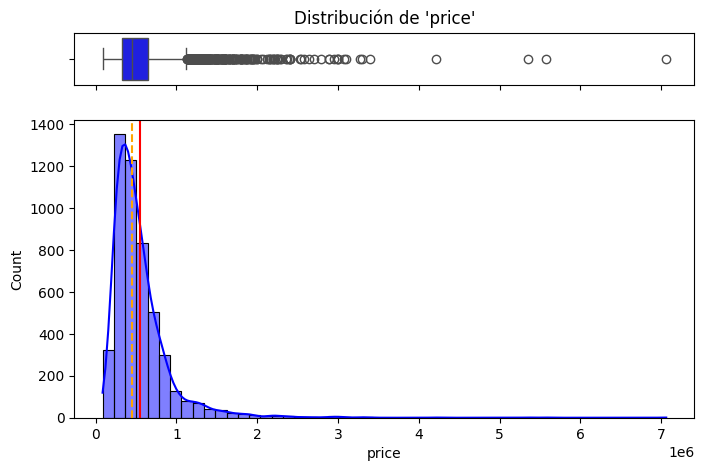

In [40]:
EDA_DataMining.num_graph(df_imputed_trf[['price']])

Se observa que tiene asimetría por la derecha (sesgo positivo), se decide aplicarle una tranformación Box-Cox, puesto que el modelo de regresión a realizar posteriormente, es sensible a la normalidad de la variable objetivo.

In [41]:
EDA_DataMining.boxcox_transf(df_imputed_trf, col = 'price')

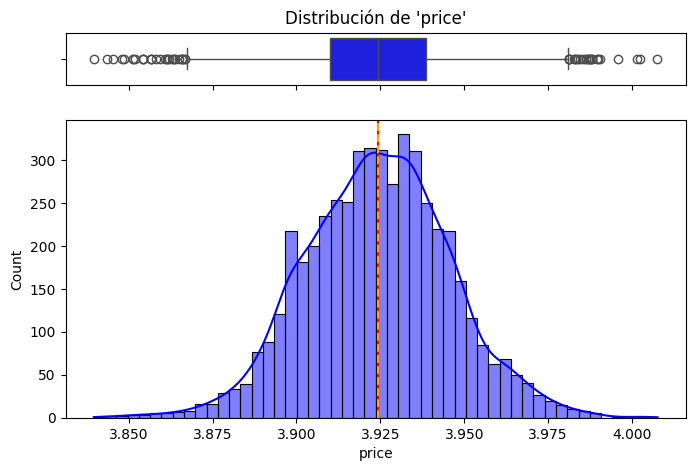

In [42]:
EDA_DataMining.num_graph(df_imputed_trf[['price']])

A continuación, se evaluará la mejor transformación para las variables continuas predictoras en función del coeficiente de correlación lineal de pearson frente a la variable objetivo, según una serie de transformaciones posibles.

In [43]:
predictoras_cont = df_imputed_trf.select_dtypes(include='number').columns.tolist()
predictoras_cont = [i for i in predictoras_cont if i != 'price']

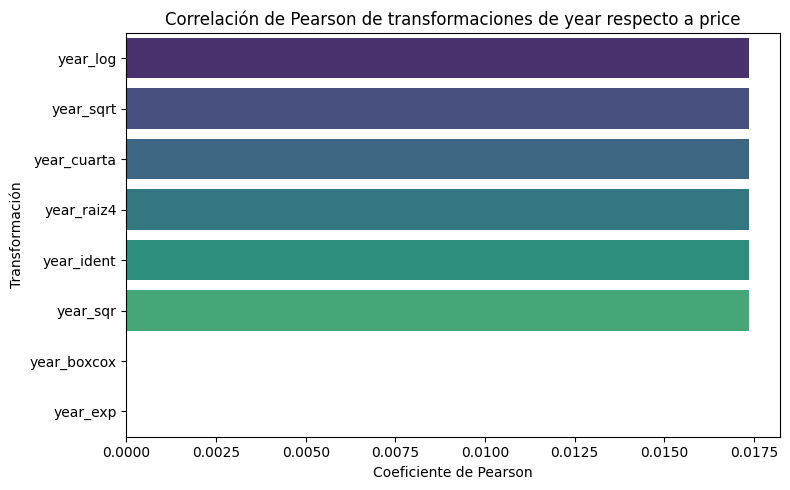

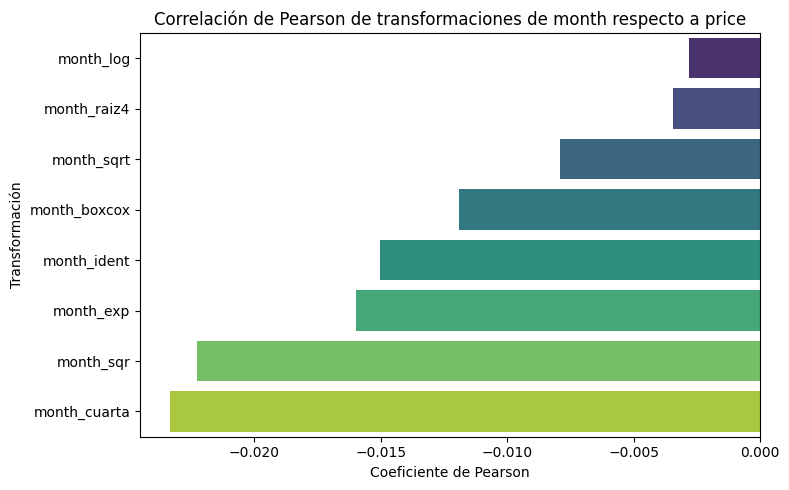

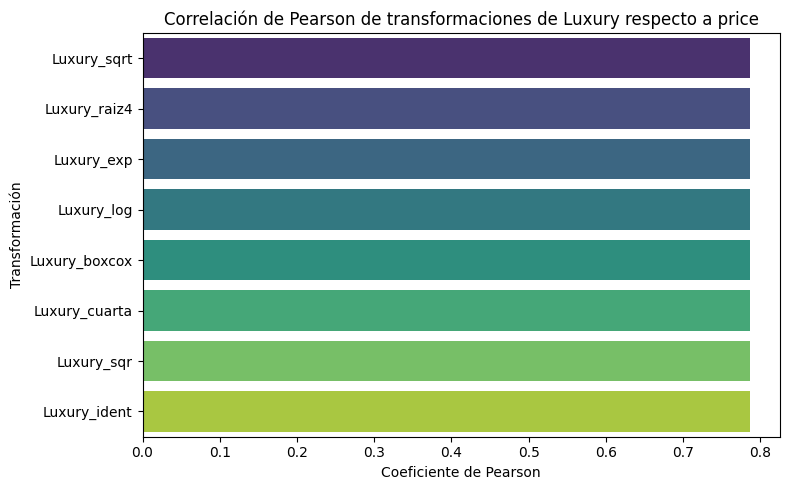

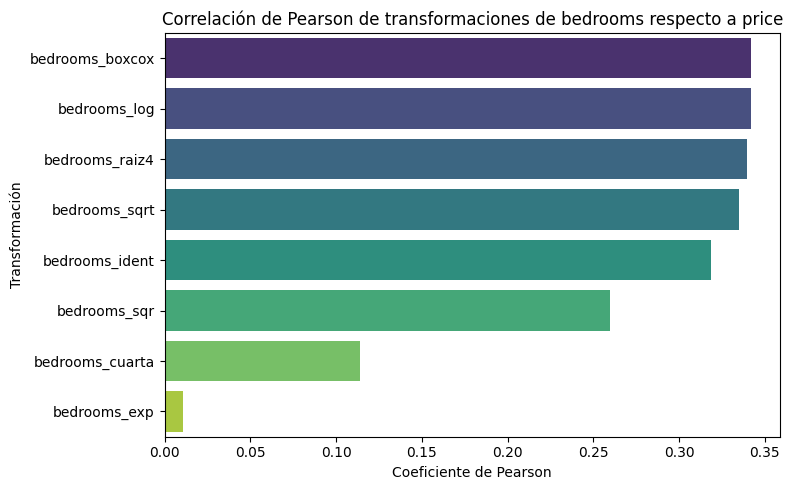

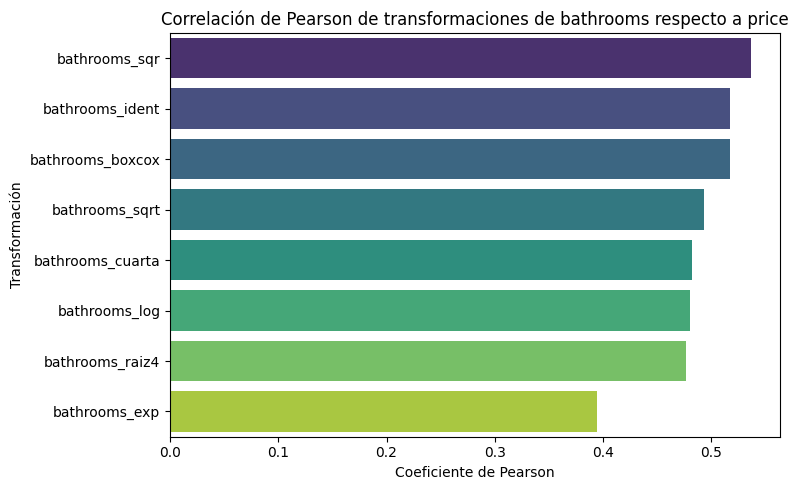

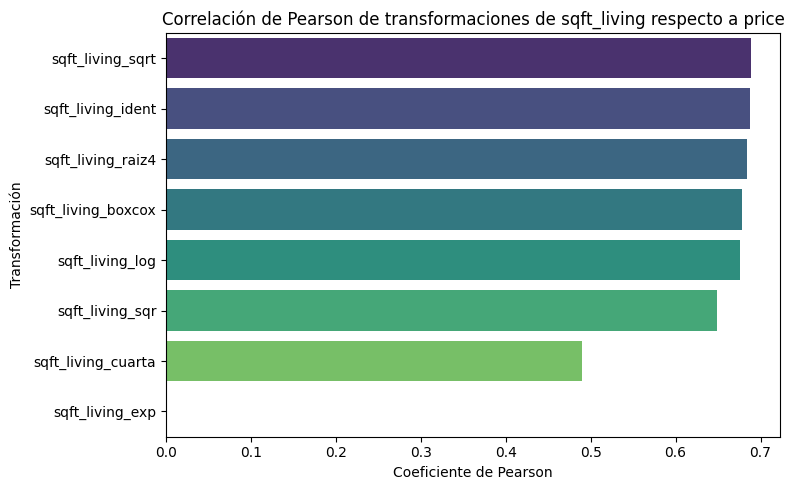

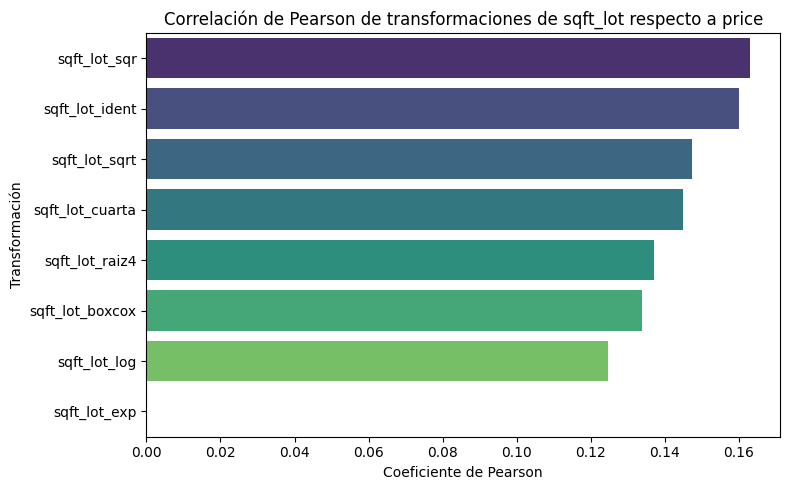

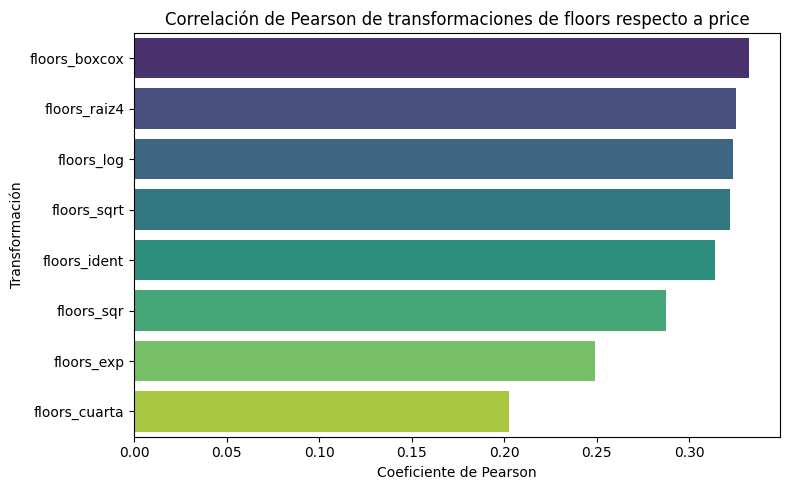

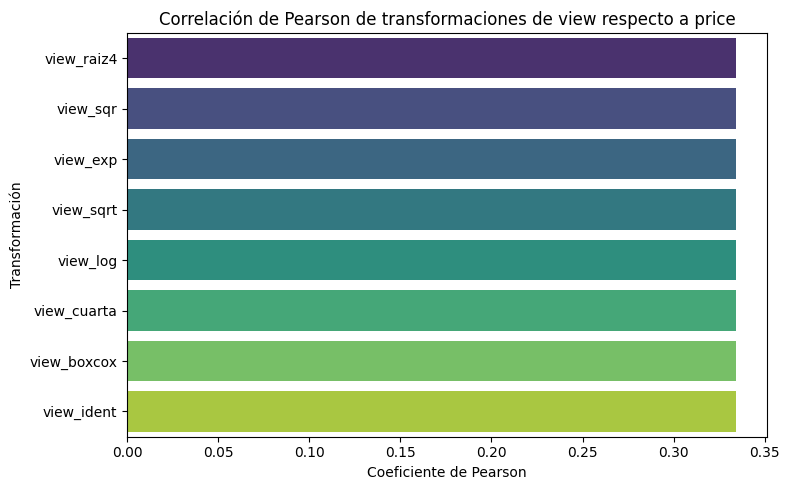

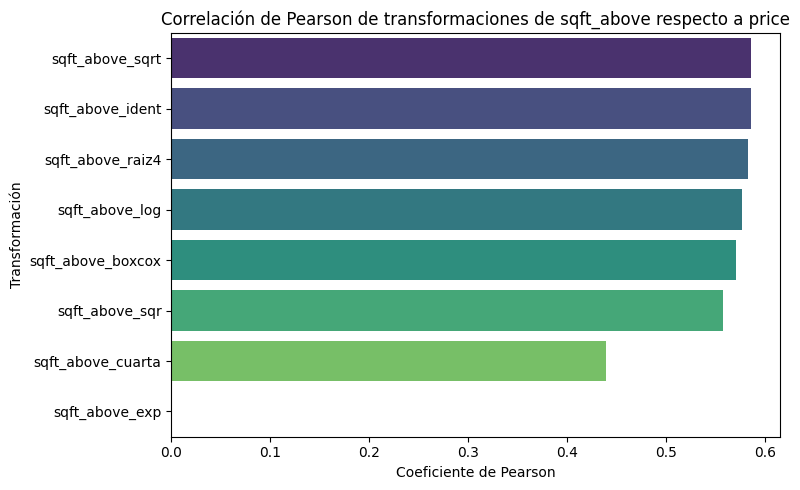

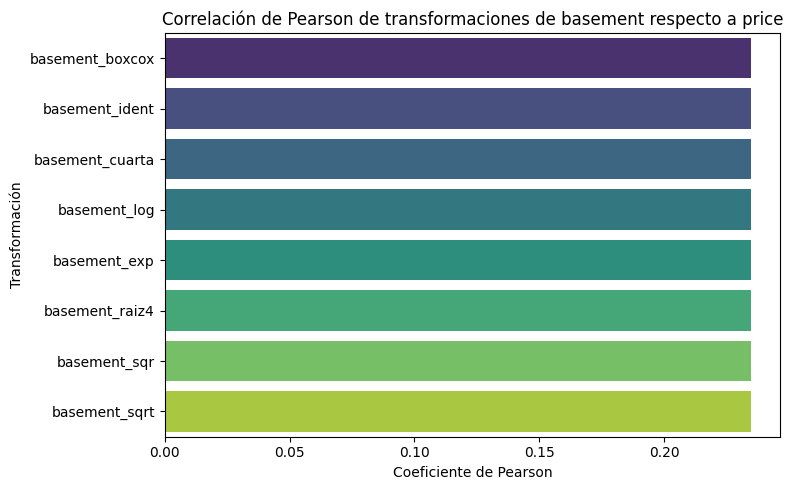

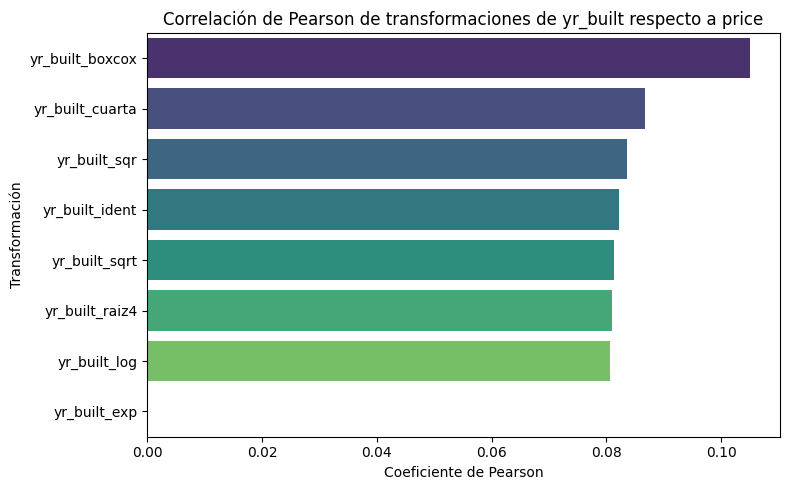

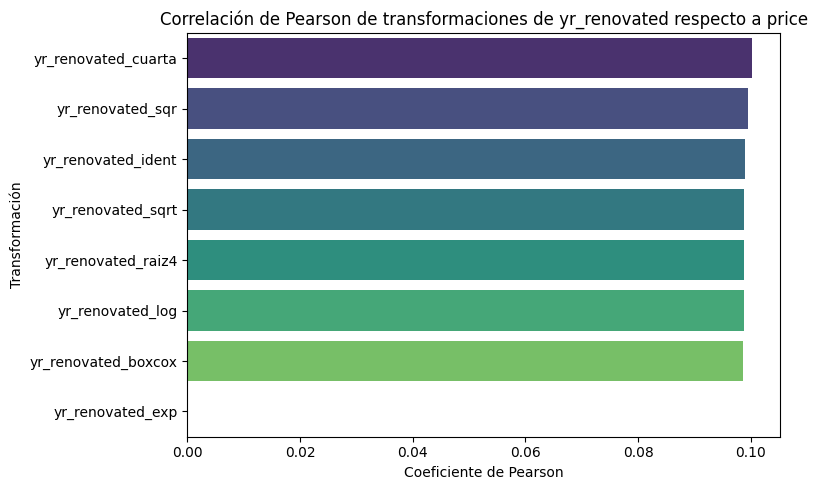

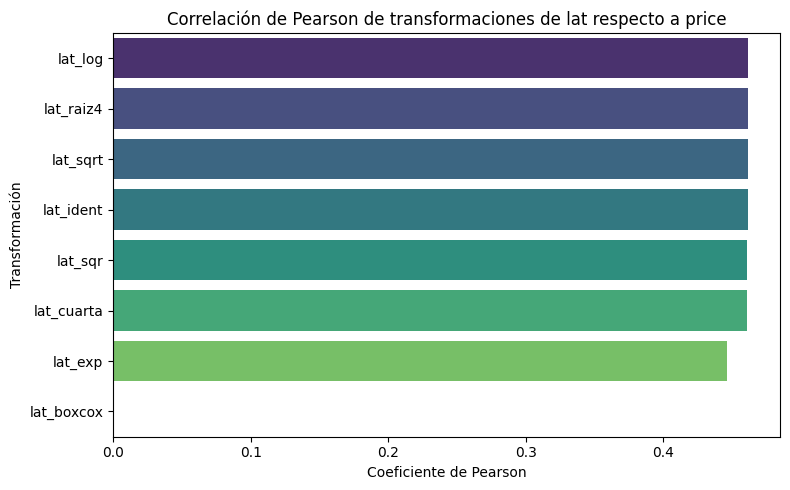

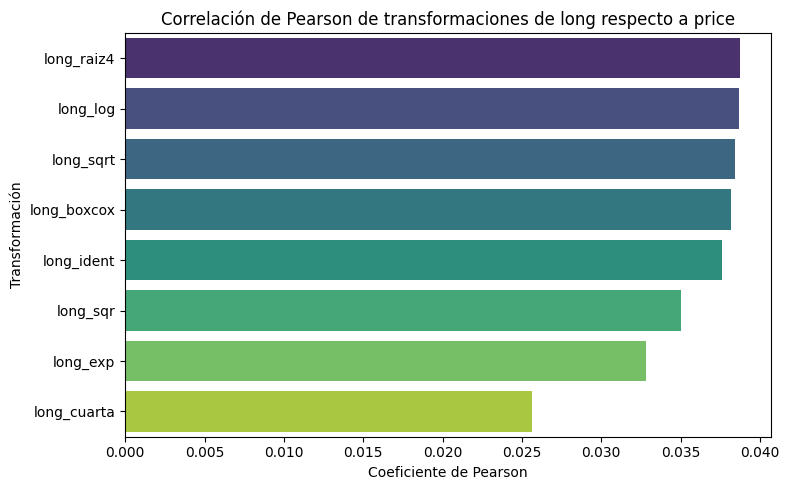

In [44]:
EDA_DataMining.transf_pearson(df_imputed_trf, predictoras_cont, 'price')

Podemos considerar year como metadato, puesto que solo tiene dos valores, y no aporta nada a la variable objetivo, además de su naturaleza por sí misma en el dataset.

In [45]:
df_imputed_trf = df_imputed_trf.drop(columns = 'year')

In [46]:
predictoras_cont = [i for i in predictoras_cont if i != 'year']

No se percibe grandes diferencias entre la distribución identidad de cada variable y cada una de sus transformaciones. Las variables bedrooms y yr_renovated se tramificarán y se pasarán categóricas debido a que no tienen una alta relación con la variable objetivo con sus distribuciones originales y a lo anteriormente mencionado, además de la propia naturaleza de sus distribuciones. 

A month, lat y long se decide no aplicarle ninguna transformación, el resto se transforman según lo que se muestra a continuación, aunque tampoco obtendremos unos cambios muy significativo en el modelado posterior.

In [47]:
df_imputed_trf['sqft_living'] = np.sqrt(df_imputed_trf['sqft_living'])
df_imputed_trf['sqft_lot'] = np.log(df_imputed_trf['sqft_lot'])
df_imputed_trf['sqft_above'] = np.sqrt(df_imputed_trf['sqft_above'])

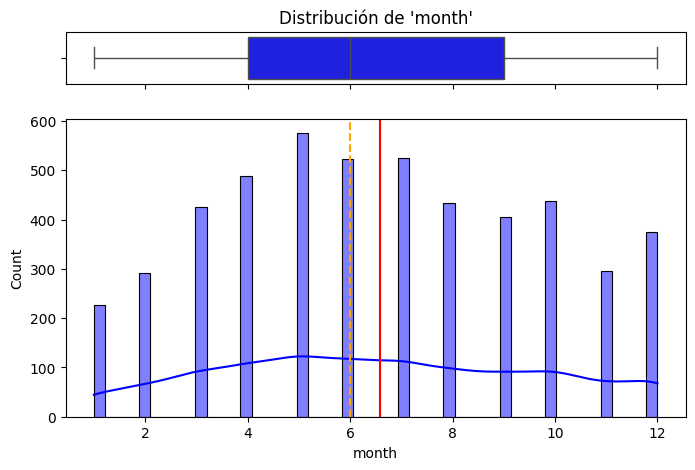

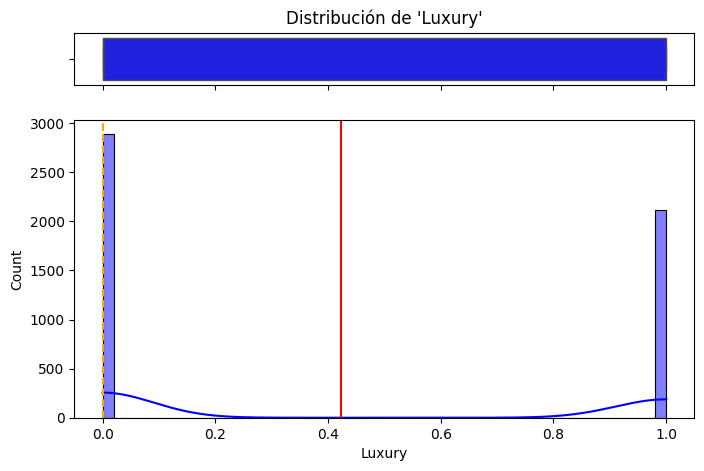

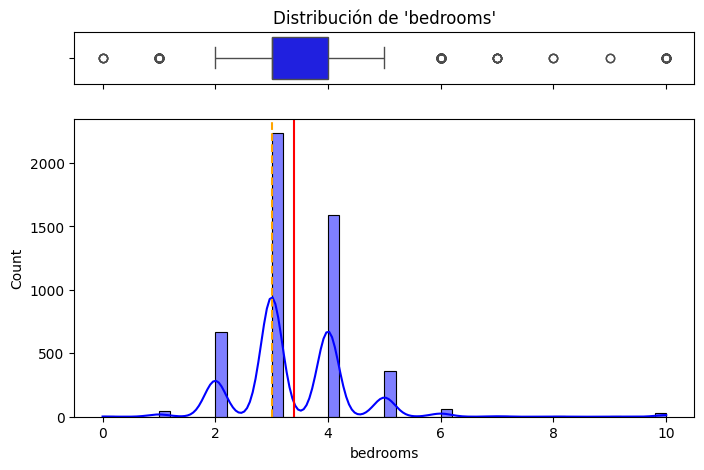

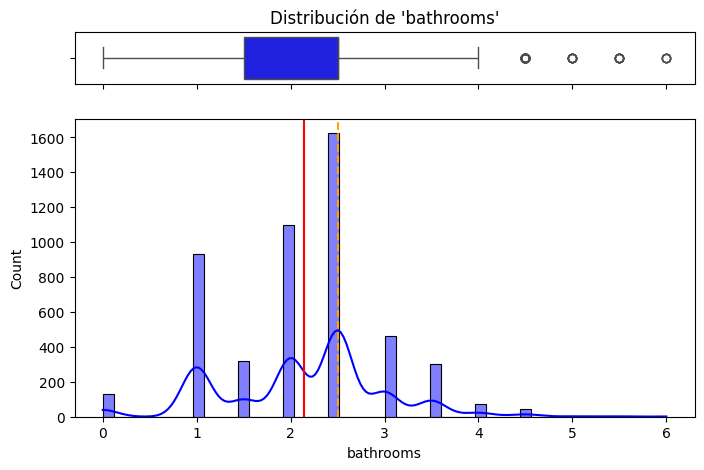

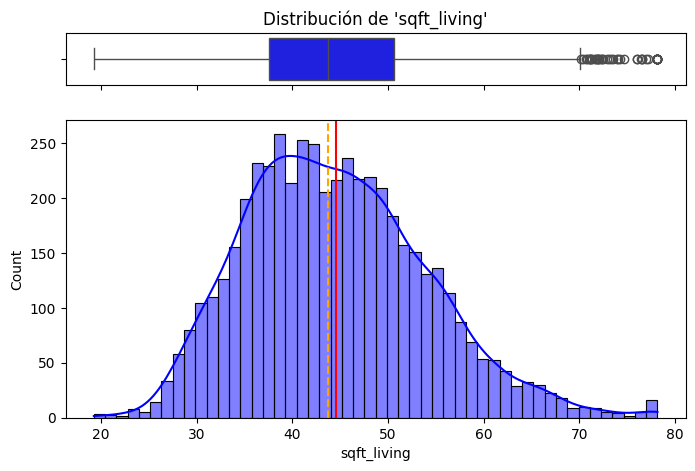

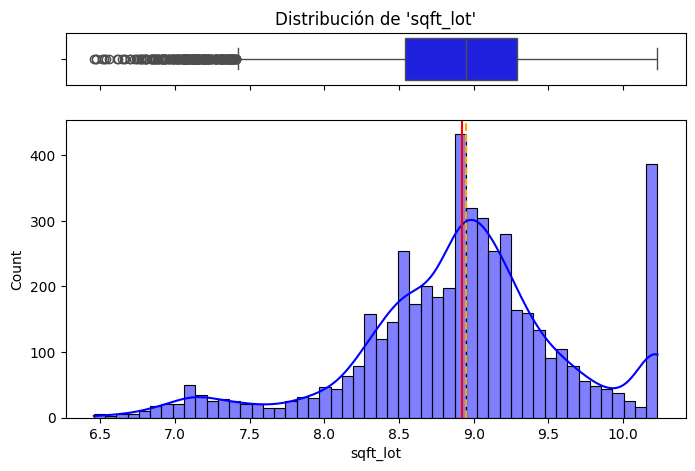

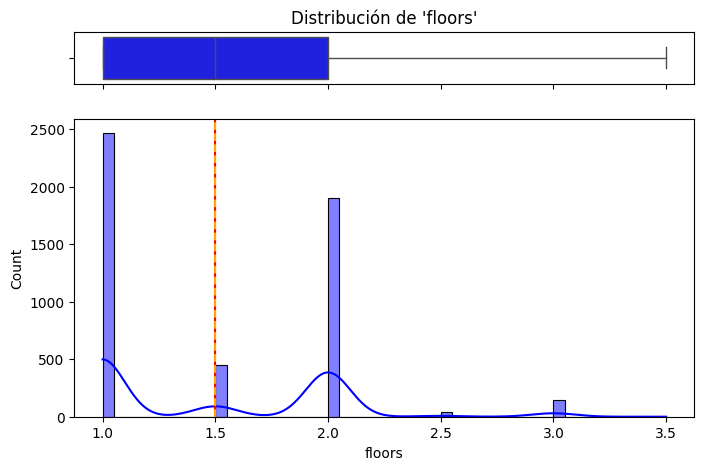

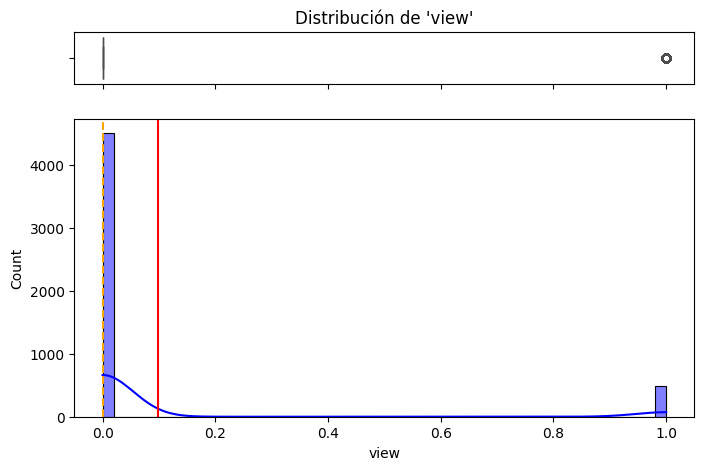

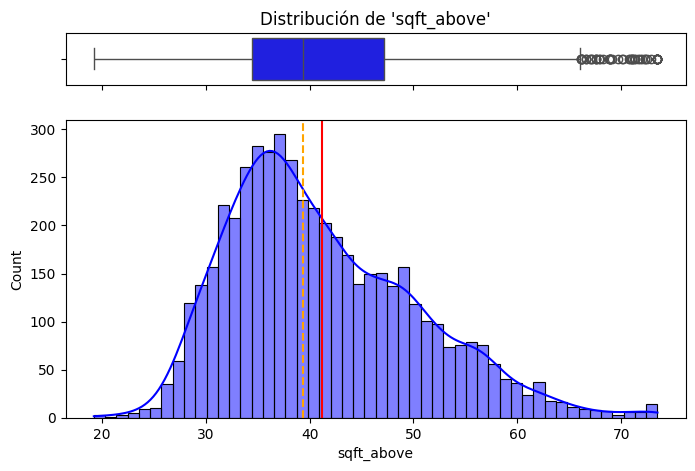

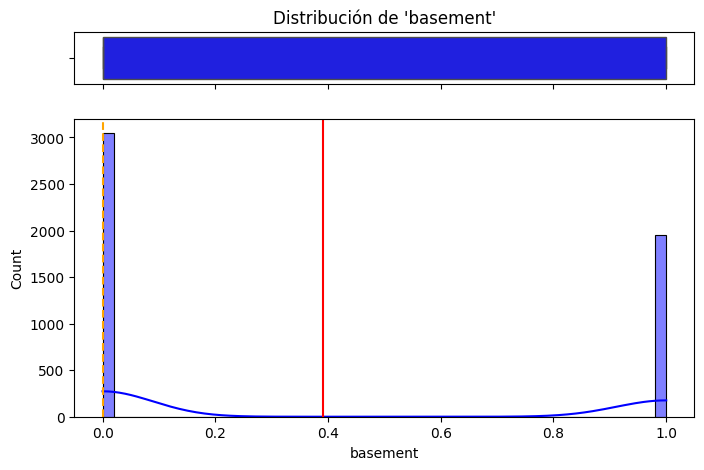

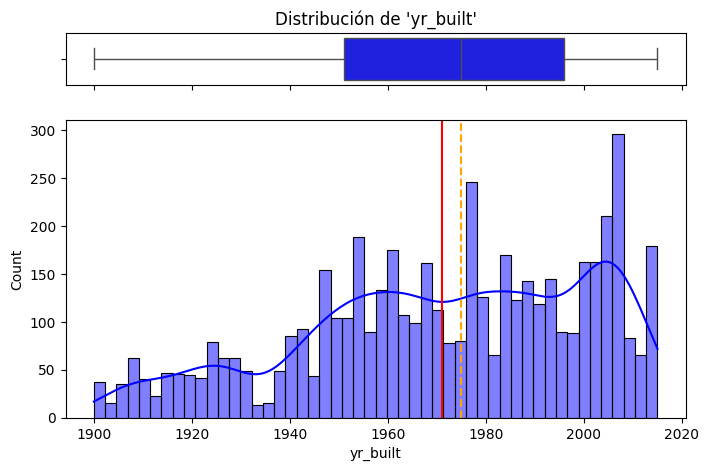

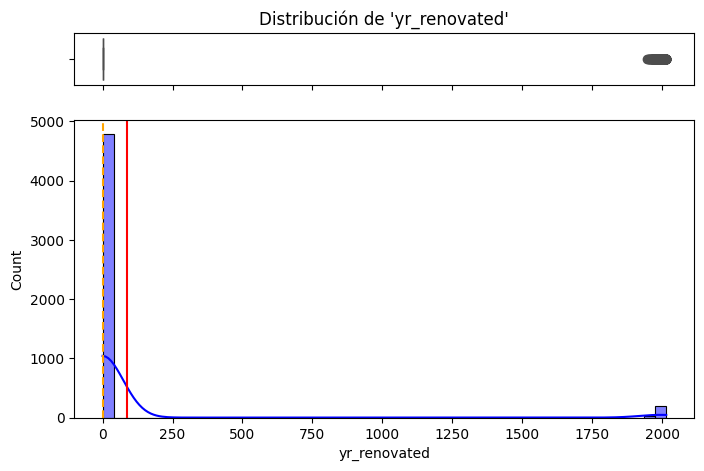

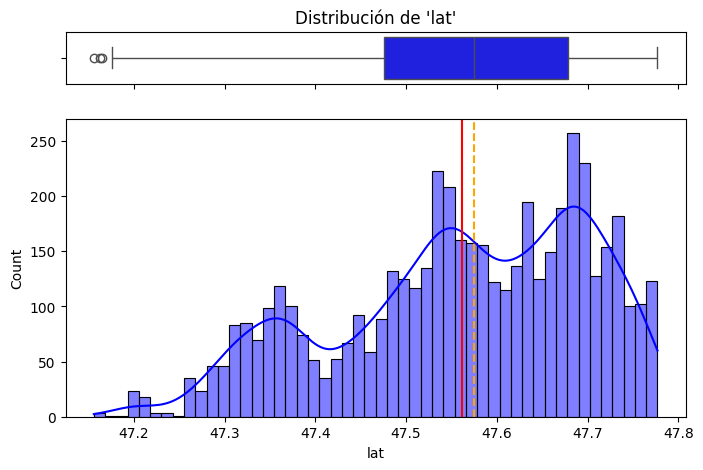

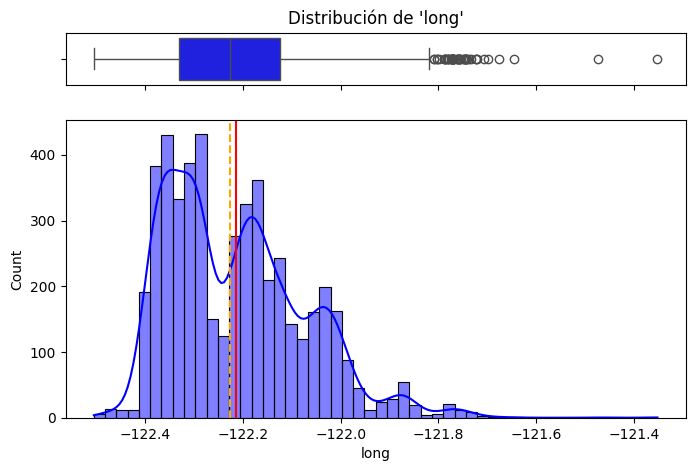

In [48]:
EDA_DataMining.num_graph(df_imputed_trf[predictoras_cont])

Las siguientes variables se transformarán directamente a categóricas, bajo sus respectivas condiciones y criterio más apropiado visualizando sus descriptivos.

In [49]:
df_imputed_trf['bedrooms'] = df_imputed_trf['bedrooms'].apply(lambda x: 'Menor o igual a 5' if x <= 5 else 'Mayor a 5')
df_imputed_trf['bedrooms'] = df_imputed_trf['bedrooms'].astype('category')

In [50]:
df_imputed_trf['yr_renovated'] = df_imputed_trf['yr_renovated'].astype('int')

df_imputed_trf['renovated'] = np.where((df_imputed_trf['yr_renovated'] != 0) & (df_imputed_trf['yr_renovated'] > 1980), 1, 0)
df_imputed_trf['renovated'] = df_imputed_trf['renovated'].astype('category')

df_imputed_trf = df_imputed_trf.drop(columns = ['yr_renovated'])

Categorizamos yr_built con OptimalBinning puesto que no hay una buena transformacion respecto a price para ella, y tiene una distribución algo anormal, plana pero algo asimétrica.

In [51]:
optb = ContinuousOptimalBinning(name='yr_built', dtype="numerical", max_n_bins=3)
optb.fit(df_imputed_trf['yr_built'].values, df_imputed_trf['price'])

x_transform_bins = optb.transform(df_imputed_trf['yr_built'].values, metric="bins")
x_transform_bins

# Incluir la variable directamente al dataset
df_imputed_trf['yr_built'] = x_transform_bins

#### Transformación de Categóricas

Visualizamos valores únicos de las variables categóricas que tenemos en nuestro dataframe.

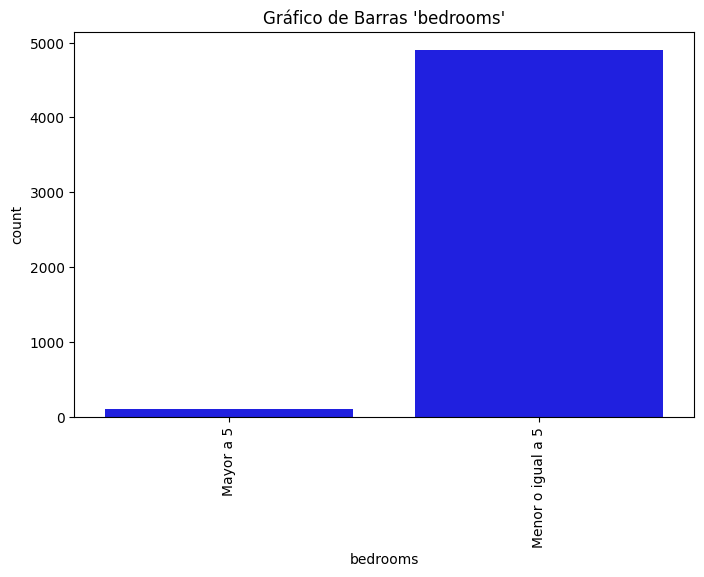

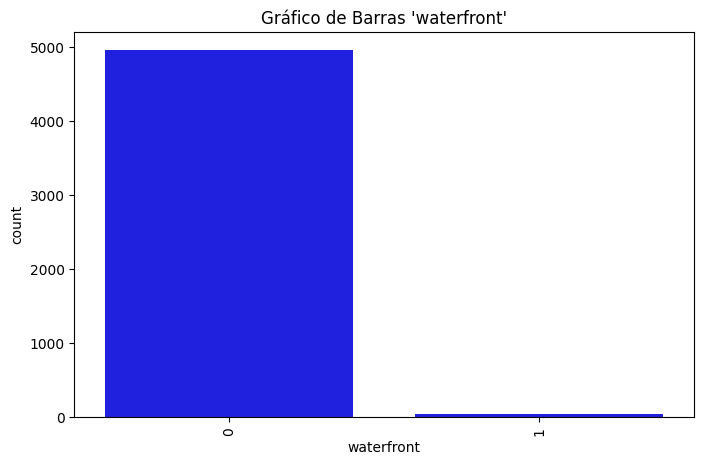

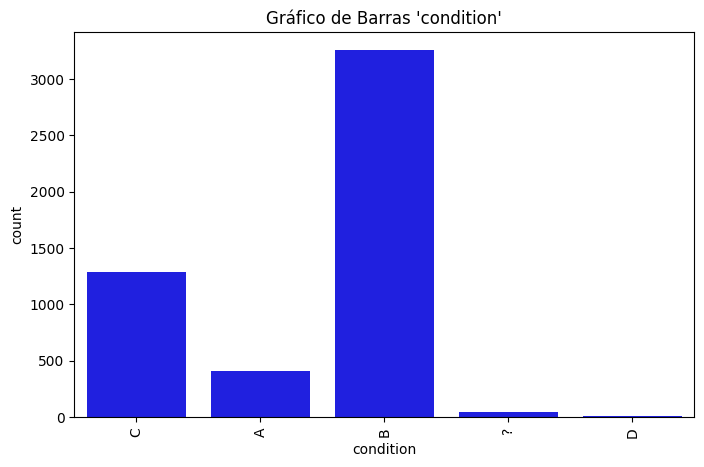

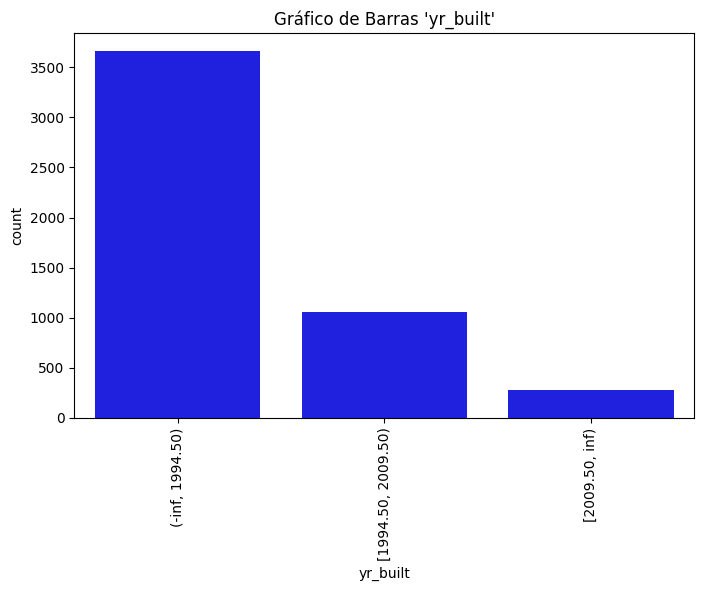

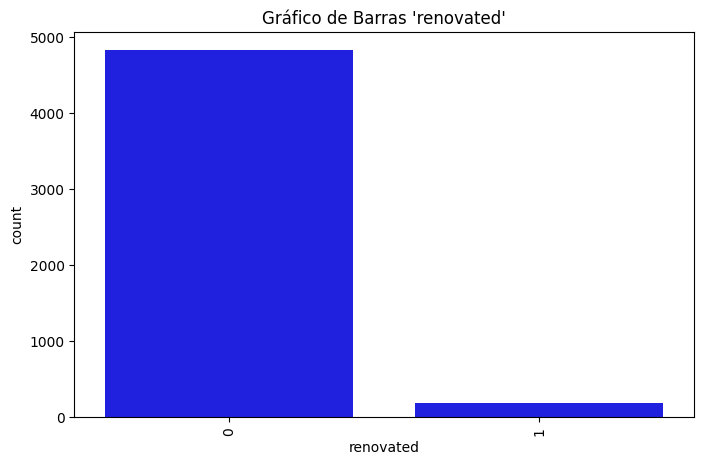

In [52]:
cat_cols = df_imputed_trf.select_dtypes(include=['category', 'object'])

EDA_DataMining.cat_graph(cat_cols)

Aplicamos las tranformacion oportunas consideradas.

In [53]:
df_imputed_trf['floors'] = df_imputed_trf['floors'].astype('float')

df_imputed_trf['floors'] = np.floor(df_imputed_trf['floors'])
df_imputed_trf['floors'] = df_imputed_trf['floors'].astype('int')
df_imputed_trf['floors'] = df_imputed_trf['floors'].astype('category')

In [54]:
df_imputed_trf['bathrooms'] = df_imputed_trf['bathrooms'].astype('float')

df_imputed_trf['bathrooms'] = np.ceil(df_imputed_trf['bathrooms'])
df_imputed_trf['bathrooms'] = df_imputed_trf['bathrooms'].apply(lambda x: 'Menor o igual a 2' if x <= 2 else 'Mayor a 2')
df_imputed_trf['bathrooms'] = df_imputed_trf['bathrooms'].astype('category')

In [55]:
df_imputed_trf['month'] = df_imputed_trf['month'].astype('int')

df_imputed_trf['quarter'] = pd.cut(df_imputed_trf['month'], bins=[0, 4, 8, 12], labels=[1, 2, 3], right=True)
df_imputed_trf['quarter'] = df_imputed_trf['quarter'].astype('category')

df_imputed_trf = df_imputed_trf.drop(columns = ['month'])

Debido a las pocas categorías 'D' y '?' en la variable *'condition'*, las transformamos a 'B' y 'C' respectivamente.

In [56]:
df_imputed_trf['condition'] = df_imputed_trf['condition'].replace({'?': 'B', 'D': 'C'})

Observamos nuestro dataset final.

In [57]:
columnas_ordenadas = ['quarter', 'Luxury', 'floors', 'bedrooms', 'bathrooms', 'basement', 'view', 'waterfront', 'condition', 'sqft_lot', 'sqft_living', 'sqft_above', 'yr_built', 'renovated', 'lat', 'long', 'price']

In [58]:
df_imputed_trf = df_imputed_trf[columnas_ordenadas]
df_imputed_trf

,quarter,Luxury,floors,bedrooms,bathrooms,basement,view,waterfront,condition,sqft_lot,sqft_living,sqft_above,yr_built,renovated,lat,long,price
0,2,1,1,Menor o igual a 5,Mayor a 2,1,0,0,C,9.443355,45.497253,39.242834,"(-inf, 1994.50)",0,47.5936,-122.013,3.938989
1,2,1,1,Menor o igual a 5,Menor o igual a 2,1,0,0,A,8.316642,40.496913,39.242834,"(-inf, 1994.50)",0,47.6624,-122.325,3.942111
2,3,1,1,Menor o igual a 5,Mayor a 2,0,1,0,B,9.038579,60.991803,60.991803,"[1994.50, 2009.50)",0,47.3216,-121.940,3.945572
3,3,1,2,Menor o igual a 5,Mayor a 2,1,0,0,B,8.313803,47.539457,43.358967,"[1994.50, 2009.50)",0,47.6422,-122.361,3.946264
4,3,0,1,Menor o igual a 5,Menor o igual a 2,1,0,0,A,9.090768,45.276926,34.205263,"(-inf, 1994.50)",0,47.7447,-122.328,3.919169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1,0,2,Menor o igual a 5,Mayor a 2,1,0,0,B,7.507141,37.282704,34.351128,"[1994.50, 2009.50)",0,47.5537,-122.282,3.915803
4996,1,0,1,Menor o igual a 5,Menor o igual a 2,0,0,0,B,9.006999,40.743098,40.743098,"(-inf, 1994.50)",0,47.4483,-122.129,3.916382
4997,1,0,1,Menor o igual a 5,Menor o igual a 2,0,0,0,C,9.044876,38.470768,38.470768,"(-inf, 1994.50)",0,47.3126,-122.361,3.894635
4998,1,0,1,Menor o igual a 5,Mayor a 2,1,0,0,B,9.846917,50.398413,39.749214,"(-inf, 1994.50)",0,47.7540,-122.144,3.926384


In [59]:
df_imputed_trf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   quarter      5000 non-null   category
 1   Luxury       5000 non-null   int64   
 2   floors       5000 non-null   category
 3   bedrooms     5000 non-null   category
 4   bathrooms    5000 non-null   category
 5   basement     5000 non-null   int64   
 6   view         5000 non-null   int64   
 7   waterfront   5000 non-null   category
 8   condition    5000 non-null   object  
 9   sqft_lot     5000 non-null   float64 
 10  sqft_living  5000 non-null   float64 
 11  sqft_above   5000 non-null   float64 
 12  yr_built     5000 non-null   object  
 13  renovated    5000 non-null   category
 14  lat          5000 non-null   float64 
 15  long         5000 non-null   float64 
 16  price        5000 non-null   float64 
dtypes: category(6), float64(6), int64(3), object(2)
memory usage: 459.9+ KB

Guardamos nuestro nuestro dataset depurado, limpio y preparado para los modelos predictivos y ML.

In [60]:
df_imputed_trf.to_csv('../data/freeze_data/df_imputed_trf.csv', index=False)

Después de todo, obtenemos nuestro dataset final limpio y depurado, listo para la aplicación de los modelos adecuados para predecir la variable price.

## Autor: Alfonso Guisado González